## Ajustes de Modelo (Overfitting vs Underfitting)

**Underfitting (subajuste)** acontece quando o modelo é simples demais e não consegue aprender os padrões dos dados. Ele tem um desempenho ruim tanto nos dados de treino quanto nos de teste, indicando que o modelo não capturou a estrutura do problema.

**Overfitting (sobreajuste)** ocorre quando o modelo é complexo demais e aprende não só os padrões, mas também o ruído dos dados de treino. Nesse caso, o desempenho no treino é muito bom, mas cai significativamente nos dados de teste, mostrando falta de generalização.

O ideal é chegar a um equilibrio de complexidade e generalização.

---

### Base para análise

A base escolhida a ser utilizada para a análise de Under/Overfitting é o Make Regression Dataset.

In [2]:
from sklearn.datasets import make_regression

# Criando o conjunto de dados
X, y = make_regression(
    n_samples=100,
    n_features=1,
    noise=20,
    random_state=42
)

Na variável **X** temos as **features**, que consiste em dados utilizado para chegar a determinado **resultado (y)**.

In [3]:
X[:10]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ]])

In [4]:
y[:10]

array([ 62.687202  , -23.76398073, -25.68676582,   7.93645654,
       -15.47549454,  36.09395877, -40.79420109, -10.82303923,
        21.41470699,  22.79862212])

Aplicando um modelo de **Regressão Linear**, podemos chegar no seguinte gráfico:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_regression(X, y):
    # Treinando regressão linear
    model = LinearRegression()
    model.fit(X, y)

    # Criando pontos ordenados para desenhar a reta
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)

    # Plot
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X_line, y_line)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Reta ajustada (Regressão Linear)")
    plt.show()

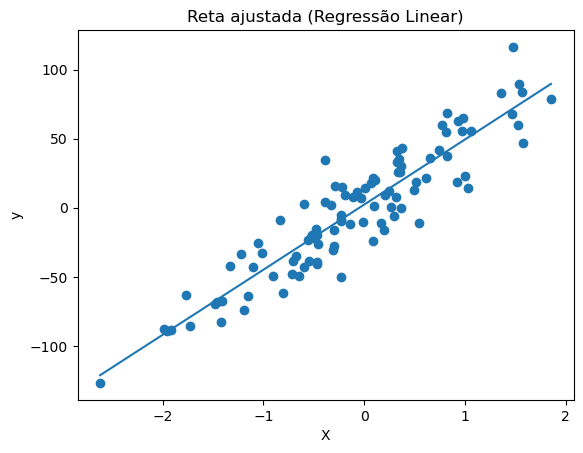

In [6]:
plot_regression(X, y)

Com base no gráfico acima, podemos perceber a distancia percorrida dos pontos em relação a reta.

In [7]:
""" Separando o conjunto de dados em treino e teste """

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
from sklearn.metrics import mean_squared_error

def linear_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = round(mean_squared_error(y_train, y_train_pred), 2)
    test_error = round(mean_squared_error(y_test, y_test_pred), 2)

    print("Erro treino:", train_error)
    print("Erro teste:", test_error)

In [9]:
linear_model(X_train, y_train, X_test, y_test)

Erro treino: 281.86
Erro teste: 413.89


Utilizando o modelo de **Regressão Linear** aplicando o **mean_squared_error** podemos determinar o erro nos conjuntos de treino e teste.  

E com isso podemos ver a proporção dos erros (distancia dos pontos em relação a reta) em ambos os casos.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_model(X_train, y_train, X_test, y_test):

    model_over = Pipeline([
        ("poly", PolynomialFeatures(degree=10)),
        ("reg", LinearRegression())
    ])

    model_over.fit(X_train, y_train)

    train_err = round(mean_squared_error(
        y_train, model_over.predict(X_train)
    ), 2)
    test_err = round(mean_squared_error(
        y_test, model_over.predict(X_test)
    ), 2)
    print("Erro treino:", train_err)
    print("Erro teste:", test_err)

In [11]:
poly_model(X_train, y_train, X_test, y_test)

Erro treino: 263.83
Erro teste: 462.33


Utilizando o modelo **Polinomial** na análise de **Regressão Linear** podemos ver os erros com base nos conjuntos de treino e de teste com **menos viés** e **menor variância**.

### Underfitting (subajuste)

**Underfitting** ocorre quando um modelo é **simples demais** para capturar os padrões existentes nos dados.  

Nesse cenário, o modelo não consegue aprender adequadamente nem mesmo a partir dos dados de treino, resultando em erros elevados tanto no conjunto de treino quanto no de teste.

Quando isso acontece, é possível perceber algumas **caracteristicas**:
- Erro **alto** no **treino/teste**
- Diferença pequena entre treino e teste
- Modelo com viés alto

O Underfitting pode vir a ocorrer quando:
- Modelo simples demais
- Poucas features relevantes
- Alto ruido

In [13]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    noise=50,  # forçando um ruido muito alto
    random_state=42
)

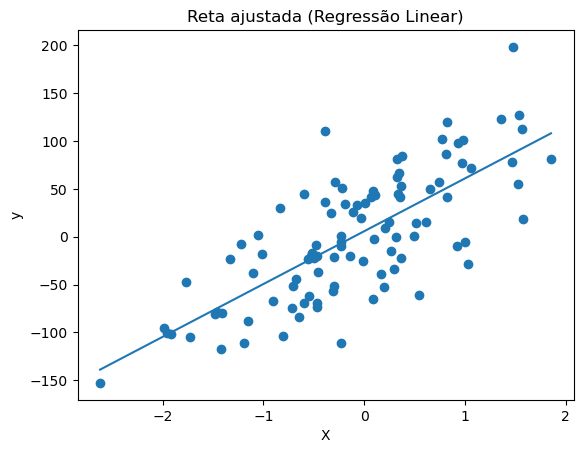

In [14]:
""" Exibindo a distância dos pontos em relação a reta """
plot_regression(X, y)

No gráfico acima podemos perceber que os dados são bem dispersos em relação a reta devido ao parametro **noise = 50**.

In [15]:
""" Separando o conjunto de dados em treino e teste """
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [20]:
linear_model(X_train, y_train, X_test, y_test)

Erro treino: 1761.61
Erro teste: 2586.83


**OBS:** A diferença entre treino e teste apresenta um **GAP pequeno** demonstrando uma boa **generalização**, indicando que o modelo treinado acompanha o teste.

In [24]:
poly_model(X_train, y_train, X_test, y_test)

Erro treino: 1648.96
Erro teste: 2889.56


Em ambos os modelos, eles apresentam **erros proximos porém elevados**, indicando o **Underfitting**.

### Overfitting (sobreajuste)

In [12]:
X, y = make_regression(
    n_samples=20,  # poucos registros
    n_features=1,
    noise=20,
    random_state=42
)

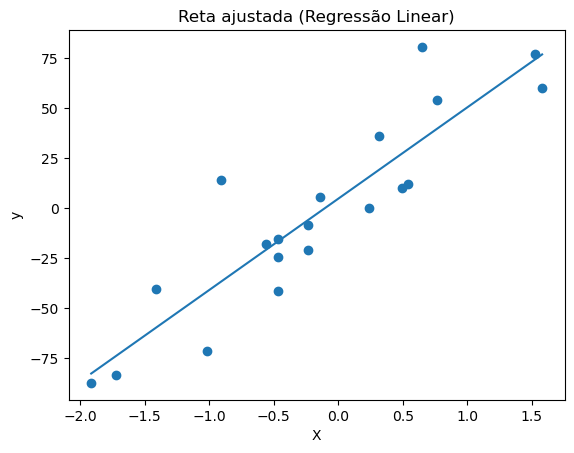

In [13]:
plot_regression(X, y)

No gráfico acima podemos ver que possui uma quantidade menor de dados devido ao parametro **n_samples=20**

In [17]:
""" Separando o conjunto de dados em treino e teste """
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
linear_model(X_train, y_train, X_test, y_test)

Erro treino: 404.92
Erro teste: 550.74


No modelo de **Regressão Linear**, houve um **GAP pequeno** e **erros** relativamente **baixos**

In [16]:
poly_model(X_train, y_train, X_test, y_test)

Erro treino: 59.11
Erro teste: 414701149.11


No caso do modelo **Polinomial**, houve um **GAP enorme** e um erro de teste extremamente alto.

Portanto, observa-se que o modelo de **Regressão Linear** apresentou um desempenho consistente, com erros de treino e teste relativamente próximos, indicando boa **generalização**.

Em contrapartida, ao utilizar o modelo de **Regressão Polinomial**, que possui maior **complexidade**, ocorreu **overfitting**, evidenciado por um erro extremamente baixo no conjunto de treino e um erro excessivamente alto no conjunto de teste.

Esse comportamento indica que o modelo polinomial se ajustou excessivamente aos dados de treino, aprendendo inclusive o ruído presente nos dados, o que comprometeu sua capacidade de generalização para dados não vistos.

### Conclusão

| Situação | Diagnóstico     |
| --------------------------------- | --------------- |
| Treino ↓ e Teste ↓                | Enviesado |
| Treino ↓ e Teste ↑                | Overfitting     |
| Treino ≈ Teste (ambos altos)      | Underfitting    |
| Treino ≈ Teste (ambos baixos)     | OK      |